### SMS SPAM CLASSIFICATION

Importing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sms = pd.read_csv('spam.csv')
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms = sms.rename(columns = {'v1':'Label', 'v2':'Message'})
sms.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Exploring Data

In [4]:
sms.shape

(5572, 2)

In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
sms.describe(include='all')

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


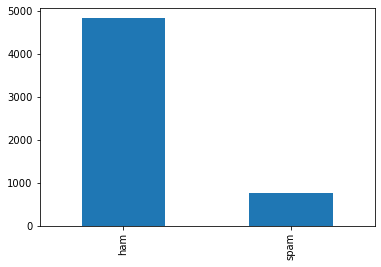

In [7]:
sms['Label'].value_counts().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'HAM vs SPAM')

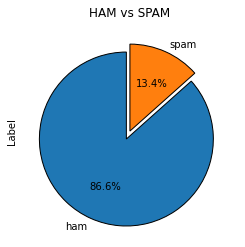

In [8]:
sms['Label'].value_counts().plot.pie(explode = [0.1,0], autopct = "%.1f%%",startangle = 90, wedgeprops={'edgecolor':'black', 'linewidth':1}).set_title('HAM vs SPAM')

Data Cleaning and preprocessing

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
lemmatizer = WordNetLemmatizer()

In [11]:
text = []

In [12]:
#Removing Punctuations and stopwords alonside converting alphabets into lowercase
for i in range(len(sms)):
    review = re.sub('[^a-zA-Z]', ' ', sms['Message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text.append(review)

Word Cloud

In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

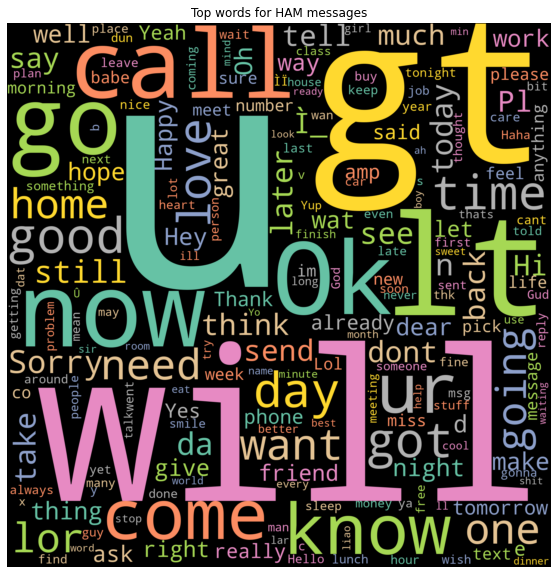

In [14]:
wc_ham = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stopwords).generate(' '.join(text for text in sms.loc[sms['Label'] == 'ham', 'Message']))
plt.figure(figsize=(10,10))
plt.title('Top words for HAM messages')
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

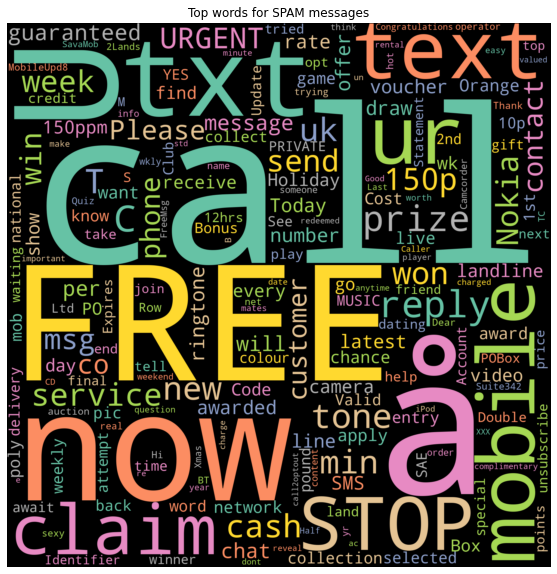

In [15]:
wc_spam = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stopwords).generate(' '.join(text for text in sms.loc[sms['Label'] == 'spam', 'Message']))
plt.figure(figsize=(10,10))
plt.title('Top words for SPAM messages')
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

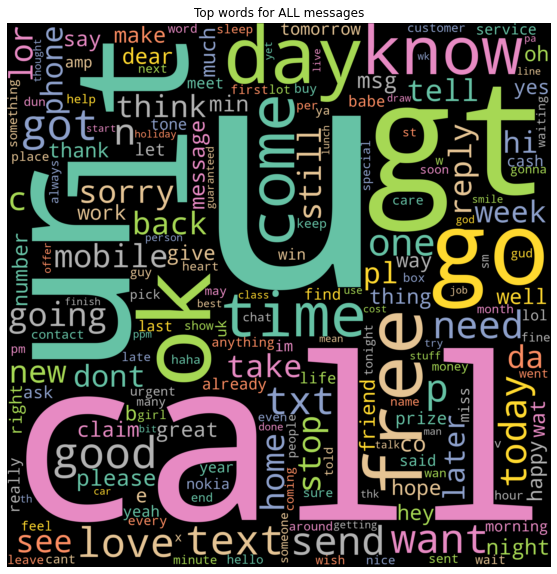

In [16]:
wc_all = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stopwords).generate(' '.join(text for text in text))
plt.figure(figsize=(10,10))
plt.title('Top words for ALL messages')
plt.imshow(wc_all, interpolation='bilinear')
plt.axis("off")
plt.show()

TF-IDF Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1000) 
X =  cv.fit_transform(text).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
y = pd.get_dummies(sms['Label'])
y = y.iloc[:,1].values #Label Encoding

Train Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Training the Model

1) Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [21]:
NB_pred = NB.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, NB_pred))
print()
print(metrics.confusion_matrix(y_test, NB_pred))
print()
print(accuracy_score(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.98      0.89      0.93       139

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


[[973   3]
 [ 15 124]]

0.9838565022421525


2) Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression()

In [24]:
logreg_pred = logreg.predict(X_test)

In [25]:
print(metrics.classification_report(y_test, logreg_pred))
print()
print(metrics.confusion_matrix(y_test, logreg_pred))
print()
print(accuracy_score(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.97      0.87      0.92       139

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


[[972   4]
 [ 18 121]]

0.9802690582959641


3) Support Vectore Machine

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [27]:
svc_pred = svc.predict(X_test)

In [28]:
print(metrics.classification_report(y_test, svc_pred))
print()
print(metrics.confusion_matrix(y_test, svc_pred))
print()
print(accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       1.00      0.93      0.96       139

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115


[[976   0]
 [ 10 129]]

0.9910313901345291


4) Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=31)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=31)

In [30]:
RF_pred = RF.predict(X_test)

In [31]:
print(metrics.classification_report(y_test, RF_pred))
print()
print(metrics.confusion_matrix(y_test, RF_pred))
print()
print(accuracy_score(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.97      0.94      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115


[[972   4]
 [  9 130]]

0.9883408071748879


4) Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [33]:
gbc_pred = gbc.predict(X_test)

In [34]:
print(metrics.classification_report(y_test, gbc_pred))
print()
print(metrics.confusion_matrix(y_test, gbc_pred))
print()
print(accuracy_score(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       976
           1       0.95      0.88      0.91       139

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115


[[970   6]
 [ 17 122]]

0.979372197309417


5) ADA Boost Classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=0)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [36]:
abc_pred = abc.predict(X_test)

In [37]:
print(metrics.classification_report(y_test, abc_pred))
print()
print(metrics.confusion_matrix(y_test, abc_pred))
print()
print(accuracy_score(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.91      0.93      0.92       139

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


[[964  12]
 [ 10 129]]

0.9802690582959641


6) Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0,max_features='auto')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_features='auto', random_state=0)

In [39]:
dtc_pred = dtc.predict(X_test)

In [40]:
print(metrics.classification_report(y_test, dtc_pred))
print()
print(metrics.confusion_matrix(y_test, dtc_pred))
print()
print(accuracy_score(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       976
           1       0.90      0.86      0.88       139

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115


[[962  14]
 [ 19 120]]

0.9704035874439462


### The accuracy for SVM is the highest followed by Random Forest, Naive Bayes & Logistic Regression.